# Lab.2 Logistic回归算法(非线性)

## 1.读取数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [3]:
#使用loadtxt函数读取数据存于变量ex2data2
#使用变量X储存ex2data2的前两列数据（芯片的两项测试结果）
#使用变量y储存ex2data2的第三列数据（标签，1表示通过测试，0表示不能通过）
#使用变量m储存样本数量
ex2data2= np.loadtxt(r'D:\browser download\machine-learning-ex2.2\ex2data2.txt',delimiter=',')
X=ex2data2[:,0:2]
y=ex2data2[:,[2]]
m=np.shape(y)[0]
print(X.shape, y.shape,m)

(118, 2) (118, 1) 118


## 2.可视化数据

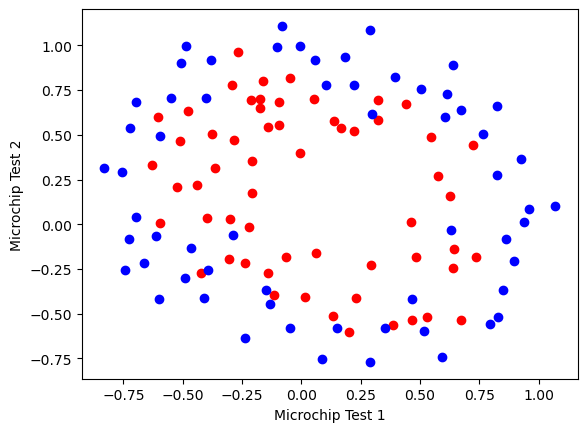

In [5]:
# 使用plt.plot（）函数绘制散点图，使用不同颜色绘制正例和负例
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
for i in range(m):
    if y[i]==1:
        plt.plot(X[i,0],X[i,1],'or')
    elif y[i]==0:
        plt.plot(X[i,0],X[i,1],'ob')

## 3.训练Logistic模型

### 3.1数据预处理：多项式特征构造，初始化θ，初始化正则化参数lambda

In [70]:
#完成函数mapFeature，输入特征值x1,x2后，返回一个数组,该数组存储维度扩增后的特征值，特征最高次为6次
#将X的前两列分别作为参数X1,X2传入mapFeatrure，并用变量x接收完成构造的特征值数组
#使用np.zeros初始化theta,规模为特征数量*1（特这个数量为np.shape(x)[1]）
#初始化正则化参数lbd为1
def mapFeature(X1,X2):
    degree = 6 # 每个Featuer的最高次
    m=np.size(X1)
    x_mapped=np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(i+1):
            feature = (X1 ** (i - j)) * (X2 ** j)
            x_mapped = np.hstack((x_mapped, feature.reshape(-1, 1)))
            
    return x_mapped

X1=X[:,0]
X2=X[:,1]
print(X1.shape,X2.shape)
x=mapFeature(X1,X2)
print(x)
theta=np.zeros((x.shape[1],1))
print(theta)
lbd=1
print(lbd)
print(x.shape,y.shape,theta.shape)

(118,) (118,)
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
1
(118, 28) (118,) (28, 1)


### 3.2定义损失函数、梯度

In [48]:
# 完成正则化的损失函数costFunction(),返回值为一维数组
# 完成正则化的梯度计算gradient()，返回值为一维数组
def sigmoid(z):
    g = np.zeros(np.shape(z))
    g = 1/(1+np.exp(-1*z))
    return g

def costFunction(theta, X, y, lbd):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    reg_term = (lbd/(2*m)) * np.sum(theta[1:]**2)  
    J_reg = J + reg_term
    return J_reg.flatten()


def gradient(theta, X, y, lbd):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot(h - y)
    reg_term = (lbd/m) * theta
    reg_term[0] = 0  
    grad_reg = grad + reg_term
    return grad_reg.flatten()

cost = costFunction(theta, x, y, lbd)
grad = gradient(theta, x, y, lbd)

print("正则化损失函数值:", cost)
print("正则化梯度:", grad)

正则化损失函数值: [0.69314718]
正则化梯度: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


### 3.3使用scipy.optimize.minimize求最小损失对应的参数theta

在Python中使用Scipy包下的scipy.optimize.minimize(fun, x0, args=(), method, jac)方法参数的维度要求很严格:  
1.fun为进行优化的目标函数，传入需调用的函数名（不需要加括号），此处为fun=costFunction。需注意调用的函数第一个参数（theta）和返回值（J）必须为一维数组  
2.x0即theta需传入一维数组  
3.args传入fun需要的其他参数，需用tuple传入  
4.method指定优化算法，此处我们使用method='TNC'  
5.jac调用梯度计算函数传入参数需与fun调用函数完全相同，且返回值为一维数组  
高维数组a调整为一维可以使用a.flatten() ，该函数会产生一个副本，不会直接改变a的维度

In [49]:
# 验证参数维度是否符合要求：代价函数和梯度函数的返回值为一维数组、传入x0的参数theta为一维数组
print(cost.ndim, grad.ndim,np.ndim(theta.flatten()))

1 1 1


In [51]:
from scipy.optimize import minimize
result = minimize(fun=costFunction,x0=theta.flatten(),args=(x,y,lbd),method='TNC',jac=gradient)
theta_star = result.x
print(result)
print(theta_star)

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.5290027299645269
       x: [ 1.273e+00  6.253e-01 ... -1.439e-01 -9.247e-01]
     nit: 7
     jac: [-2.152e-06  6.794e-07 ...  1.664e-08 -7.352e-07]
    nfev: 32
[ 1.27271026  0.62529964  1.18111686 -2.01987399 -0.91743189 -1.43166928
  0.12393228 -0.36553118 -0.35725404 -0.17516292 -1.45817008 -0.05098417
 -0.61558558 -0.27469164 -1.19271299 -0.24217841 -0.20603303 -0.04466177
 -0.27778947 -0.29539513 -0.45645982 -1.04319153  0.02779373 -0.29244865
  0.01555759 -0.32742404 -0.14389149 -0.92467489]


## 4.评估Logistic回归模型

### 4.1绘制决策边界


C:\Users\孙嘉泽\AppData\Local\Temp\ipykernel_24620\2527354072.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_theta[i][j] = np.dot(mapFeature(grid_x1[i], grid_x2[j]), theta_star)


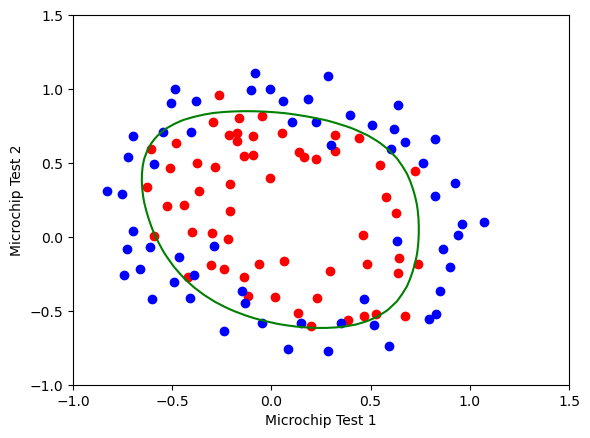

In [66]:
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
for i in range(m):
    if y[i] == 1: 
        plt.plot(X[i,0], X[i,1], 'or')
    elif y[i] == 0: 
        plt.plot(X[i,0], X[i,1], 'ob')

grid_x1 = np.linspace(-1, 1.5, 50)
grid_x2 = np.linspace(-1, 1.5, 50)
x_theta = np.zeros((grid_x1.size,grid_x2.size))
for i in range(grid_x1.size):
    for j in range(grid_x2.size):
        x_theta[i][j] = np.dot(mapFeature(grid_x1[i], grid_x2[j]), theta_star)
x_theta = x_theta.T
plt.contour(grid_x1, grid_x2, x_theta,[0], colors='green' )

plt.savefig('test2.svg', dpi=300, format='svg')
plt.show()

### 4.2计算模型准确率

In [73]:
def predict(theta, X):
    h = sigmoid(X.dot(theta))
    predictions = (h >= 0.5).astype(int)
    return predictions


predictions = predict(theta_star, x)


accuracy = np.mean(predictions == y.flatten()) * 100
print(f"模型在训练集上的准确率为: {accuracy}%")


模型在训练集上的准确率为: 83.05084745762711%
